# Fractional Brownian Motion Parameter Estimation Using Variance Aggregation

Consider a time series of $n$, identically distributed samples,</br>

$
\begin{align}
X_1, X_2,X_3,\ldots,X_n
\end{align}
$

Divide the series into $d$ smaller series of length $m$ where $md=n$.\ and let,</br>
$k = 0,1,2,3,\ldots,d-1$ and define the aggregated sum by,

$
\begin{align}
X_k^m &= \frac{1}{m}\left( X_{km+1} + X_{km+2} + \cdots + X_{km+m-1} + X_{km+m} \right) \\
&= \frac{1}{m} \left( X_{km+1} + \cdots + X_{(k+1)m} \right) \\
&= \frac{1}{m} \sum_{i=km+1}^{(k+1)m} X_i
\end{align}
$

The aggregated mean is given by,

$
\begin{align}
\text{E}[X^m] &= \frac{1}{d}\sum_{i=1}^d X_i^m \\
&= \frac{1}{dm} \sum_{i=1}^d \sum_{j=im+1}^{(k+1)i} X_j \\
&= \frac{1}{n} \sum_{i=1}^n X_i
\end{align}
$

and the aggregated variance by,

$
\begin{align}
\text{Var}[X^m] = \frac{1}{d} \sum_{i=1}^d\left( X^m_i - \text{E}[X^m] \right)^2
\end{align}
$

This method makes use of the self similarity of fractional brownian motion. Consider the aggregated process,

$
\begin{align}
X_0^m = \frac{1}{m} \sum_{i=1}^m X_i
\end{align}
$

From self similarity of fractional brownian motion,

$
\begin{align}
X_{ai} \sim a^H X_i
\end{align}
$

Since the distribution of the sum of Gaussian random variables is the distribution of the last it follows that,</br> 

$
\begin{align}
X_0^m \sim \frac{1}{m} X_m \sim \frac{m^H}{m} X_1 = m^{H-1} X_1
\end{align}
$

For fractional brownian noise,

$
\begin{align}
&\text{E}[\Delta Z^H_t] = 0 \\
&\text{Var}[\Delta Z^H_t] = \Delta t^{2H}
\end{align}
$

$X_1$ is a single increment of brownian motion it follows that,

$
\begin{align}
\text{Var}[X_1] = \Delta t^{2H} = \sigma^2
\end{align}
$

so,

$
\begin{align}
\text{Var}[X_0^m] = \text{Var}[m^{H-1} X_1] = m^{2(H-1)}\text{Var}[X_1] = \sigma^2 m^{2(H-1)}
\end{align}
$

From stationarity of it follows that,

$
\begin{align}
\text{Var}[X_k^m] = \sigma^2 m^{2(H-1)}
\end{align}
$

It follows that $H$ can be determined by using OLS on $\text{Var}[X_k^m]$ as a function of $m$.

## Imports

In [1]:
%reload_ext autoreload
%autoreload 2

# import system modules and set local import path
import os
import sys
import numpy
from matplotlib import pyplot

sys.path.insert(0, os.path.abspath('../..'))

# import local modules
from lib import config
from lib import (Stats, FBM, PlotType)
from lib import (curve, stack, single_var)

# Config Plot Style
pyplot.style.use(config.glyfish_style)

/Users/troy/.pyenv/versions/gly.fish.3.9.2/lib/python3.9/site-packages/pandas/compat/__init__.py:109: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


## Helpers

In [2]:
Δt = 1.0
npts = 2**10
nagg = 100
m_vals = [1, 10, 50]

def agg_comparison(fbm, H):
    title = f"Aggregated Fractional Brownian Noise: Δt={Δt}, H={H}"
    labels = [f"m={m}" for m in m_vals]
    params = [{"m": m} for m in m_vals]
    m_scan = Stats.Func.AGG.apply_parameter_scan(fbm, *params)
    stack(m_scan, ylim=[-3.5, 3.5], title=title, labels=labels)

## Simulation $H=0.8$

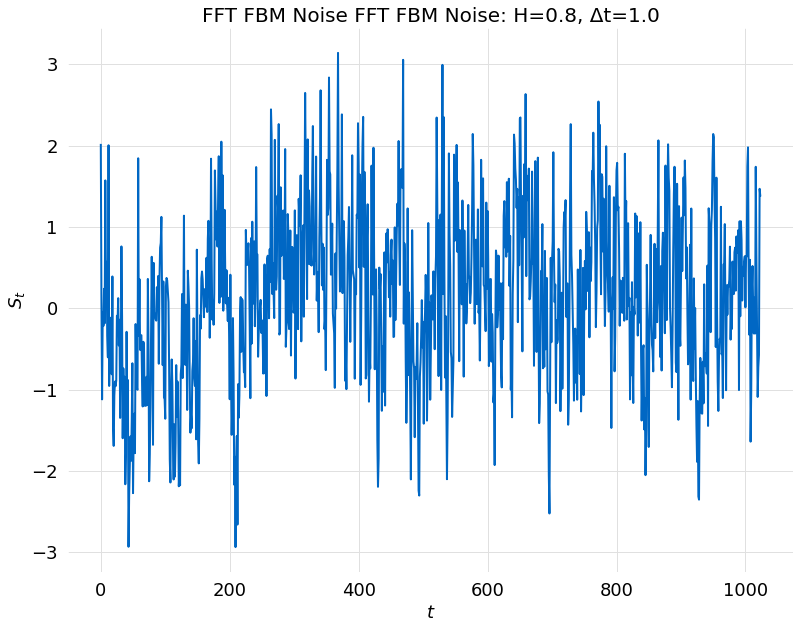

In [3]:
H = 0.8
fbm = FBM.Source.NOISE_FFT.create(H=H, npts=npts)
curve(fbm)

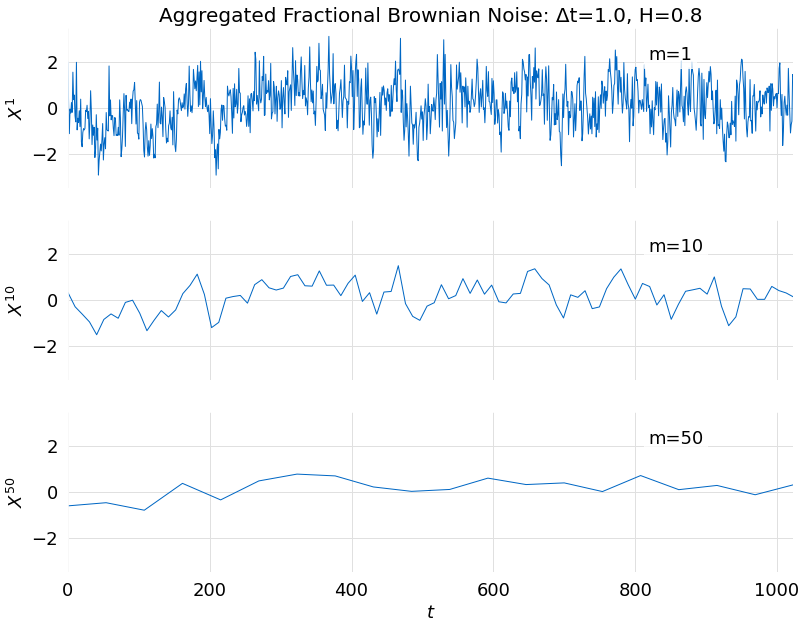

In [4]:
agg_comparison(fbm, H)

In [5]:
agg_var = Stats.Func.AGG_VAR.apply(fbm, m_max=nagg, npts=nagg)
agg_var.attrs

{'SourceType': <Source.NOISE_FFT: 'FBM_NOISE_FFT'>,
 'SourceName': 'FFT-FBM-Noise-Simulation-94b7e62c-8cba-4924-9b1a-6b45d79cb43c',
 'Schema': DataSchema(xcol=(t), ycol=(S(t)), data_type=(DataType.TIME_SERIES)),
 'Date': '20/06/2022 16:18:38',
 'Type': <Func.AGG_VAR: 'AGG_VAR'>,
 'Name': 'AGG_VAR-eb03b208-cb52-4357-a49e-861080d4ca4e',
 'SchemaIterations': None,
 'FBM_NOISE_FFT': {'npts': 1024,
  'DataType': <DataType.TIME_SERIES: 'TIME_SERIES'>,
  'Parameters': {'H': 0.8, 'Δt': 1.0},
  'Description': 'FFT FBM Noise',
  'ylabel': '$S_t$',
  'xlabel': '$t$',
  'SourceSchema': None,
  'Formula': None,
  'Estimates': {},
  'Tests': {}},
 'AGG_VAR': {'npts': 100,
  'DataType': <DataType.TIME_SERIES: 'TIME_SERIES'>,
  'Parameters': {'npts': 100, 'm_max': 100, 'm_min': 1.0},
  'Description': 'Aggregated Variance',
  'ylabel': '$Var(X^m)$',
  'xlabel': '$m$',
  'SourceSchema': DataSchema(xcol=(t), ycol=(S(t)), data_type=(DataType.TIME_SERIES)),
  'Formula': None,
  'Estimates': {},
  'Tests': 

In [6]:
results = FBM.Est.AGG_VAR.perform(agg_var)
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   S(t)   R-squared:                       0.985
Model:                            OLS   Adj. R-squared:                  0.985
Method:                 Least Squares   F-statistic:                     6290.
Date:                Mon, 20 Jun 2022   Prob (F-statistic):           1.03e-90
Time:                        16:18:38   Log-Likelihood:                 204.25
No. Observations:                 100   AIC:                            -404.5
Df Residuals:                      98   BIC:                            -399.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0746      0.006     11.848      0.000       0.062       0.087
t             -0.4312      0.005    -79.312      0.000      -0.442      -0.420
==============================================================================
Omnibus:                       11.075   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.004   Jarque-Bera (JB):               12.658
Skew:                          -0.629   Prob(JB):                      0.00178
Kurtosis:                       4.206   Cond. No.                         3.75
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [7]:
agg_var.attrs

{'SourceType': <Source.NOISE_FFT: 'FBM_NOISE_FFT'>,
 'SourceName': 'FFT-FBM-Noise-Simulation-94b7e62c-8cba-4924-9b1a-6b45d79cb43c',
 'Schema': DataSchema(xcol=(t), ycol=(S(t)), data_type=(DataType.TIME_SERIES)),
 'Date': '20/06/2022 16:18:38',
 'Type': <Func.AGG_VAR: 'AGG_VAR'>,
 'Name': 'AGG_VAR-eb03b208-cb52-4357-a49e-861080d4ca4e',
 'SchemaIterations': None,
 'FBM_NOISE_FFT': {'npts': 1024,
  'DataType': <DataType.TIME_SERIES: 'TIME_SERIES'>,
  'Parameters': {'H': 0.8, 'Δt': 1.0},
  'Description': 'FFT FBM Noise',
  'ylabel': '$S_t$',
  'xlabel': '$t$',
  'SourceSchema': None,
  'Formula': None,
  'Estimates': {},
  'Tests': {}},
 'AGG_VAR': {'npts': 100,
  'DataType': <DataType.TIME_SERIES: 'TIME_SERIES'>,
  'Parameters': {'npts': 100, 'm_max': 100, 'm_min': 1.0},
  'Description': 'Aggregated Variance',
  'ylabel': '$Var(X^m)$',
  'xlabel': '$m$',
  'SourceSchema': DataSchema(xcol=(t), ycol=(S(t)), data_type=(DataType.TIME_SERIES)),
  'Formula': None,
  'Estimates': {'AGG_VAR': {'E

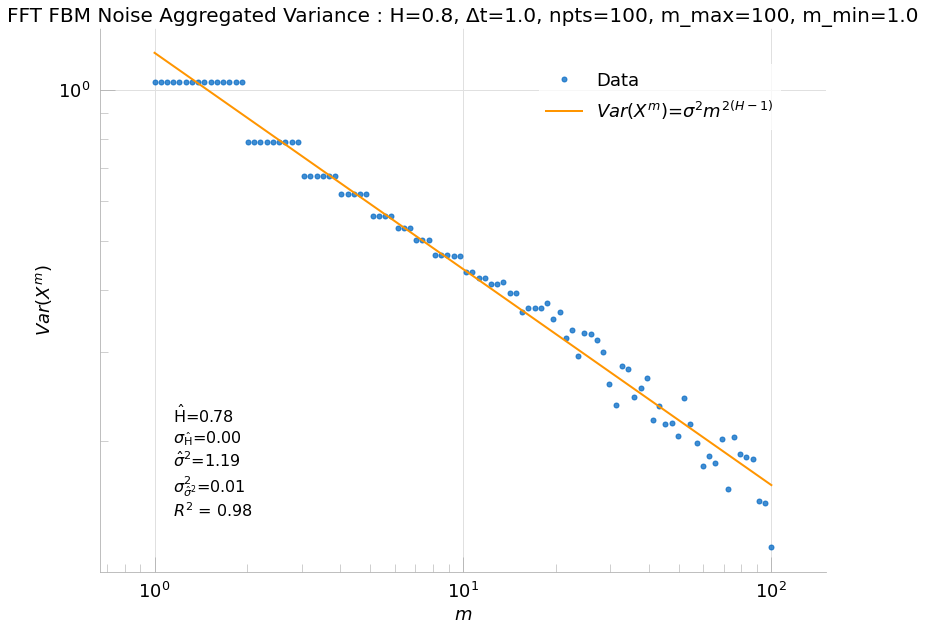

In [8]:
single_var(agg_var, est_type=FBM.Est.AGG_VAR)

## Simulation $H=0.6$

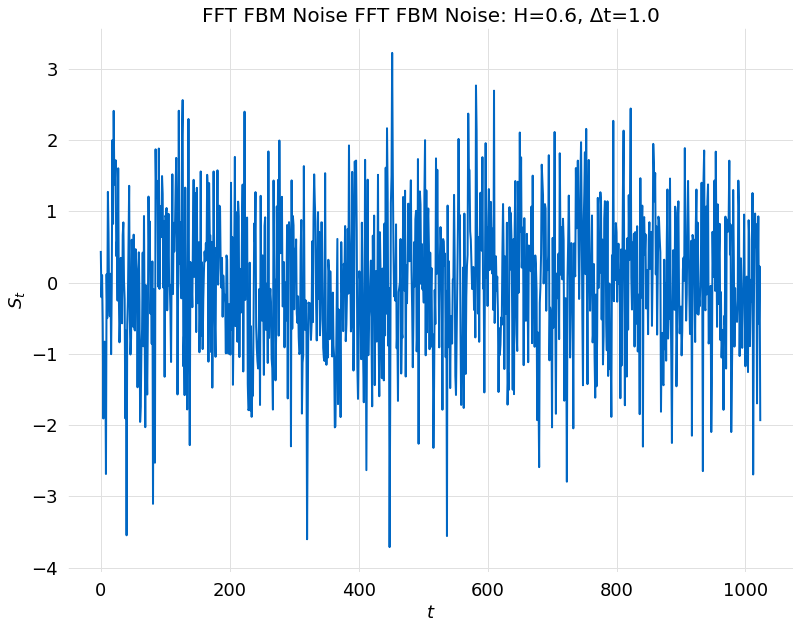

In [9]:
H = 0.6
fbm = FBM.Source.NOISE_FFT.create(H=H, npts=npts)
curve(fbm)

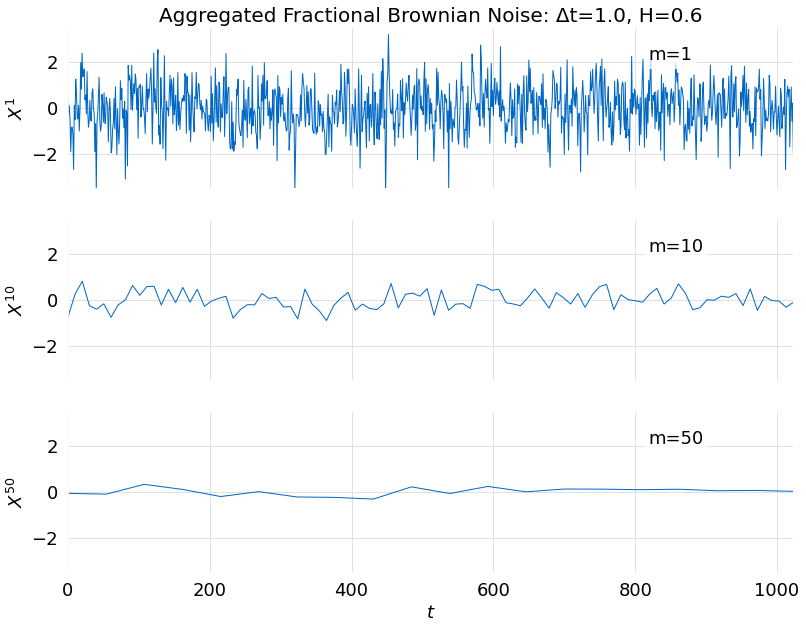

In [10]:
agg_comparison(fbm, H)

In [11]:
agg_var = Stats.Func.AGG_VAR.apply(fbm, m_max=nagg, npts=nagg)
agg_var.attrs

{'SourceType': <Source.NOISE_FFT: 'FBM_NOISE_FFT'>,
 'SourceName': 'FFT-FBM-Noise-Simulation-abf899cb-f098-4f07-bee4-e3cefb3e6e3e',
 'Schema': DataSchema(xcol=(t), ycol=(S(t)), data_type=(DataType.TIME_SERIES)),
 'Date': '20/06/2022 16:18:39',
 'Type': <Func.AGG_VAR: 'AGG_VAR'>,
 'Name': 'AGG_VAR-0f9117c7-c165-4f40-ae13-456b5aba39a3',
 'SchemaIterations': None,
 'FBM_NOISE_FFT': {'npts': 1024,
  'DataType': <DataType.TIME_SERIES: 'TIME_SERIES'>,
  'Parameters': {'H': 0.6, 'Δt': 1.0},
  'Description': 'FFT FBM Noise',
  'ylabel': '$S_t$',
  'xlabel': '$t$',
  'SourceSchema': None,
  'Formula': None,
  'Estimates': {},
  'Tests': {}},
 'AGG_VAR': {'npts': 100,
  'DataType': <DataType.TIME_SERIES: 'TIME_SERIES'>,
  'Parameters': {'npts': 100, 'm_max': 100, 'm_min': 1.0},
  'Description': 'Aggregated Variance',
  'ylabel': '$Var(X^m)$',
  'xlabel': '$m$',
  'SourceSchema': DataSchema(xcol=(t), ycol=(S(t)), data_type=(DataType.TIME_SERIES)),
  'Formula': None,
  'Estimates': {},
  'Tests': 

In [12]:
results = FBM.Est.AGG_VAR.perform(agg_var)
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   S(t)   R-squared:                       0.985
Model:                            OLS   Adj. R-squared:                  0.985
Method:                 Least Squares   F-statistic:                     6341.
Date:                Mon, 20 Jun 2022   Prob (F-statistic):           7.00e-91
Time:                        16:18:39   Log-Likelihood:                 129.36
No. Observations:                 100   AIC:                            -254.7
Df Residuals:                      98   BIC:                            -249.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1237      0.013      9.293      0.000       0.097       0.150
t             -0.9155      0.011    -79.633      0.000      -0.938      -0.893
==============================================================================
Omnibus:                        2.892   Durbin-Watson:                   1.279
Prob(Omnibus):                  0.235   Jarque-Bera (JB):                2.801
Skew:                          -0.069   Prob(JB):                        0.247
Kurtosis:                       3.808   Cond. No.                         3.75
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [13]:
agg_var.attrs

{'SourceType': <Source.NOISE_FFT: 'FBM_NOISE_FFT'>,
 'SourceName': 'FFT-FBM-Noise-Simulation-abf899cb-f098-4f07-bee4-e3cefb3e6e3e',
 'Schema': DataSchema(xcol=(t), ycol=(S(t)), data_type=(DataType.TIME_SERIES)),
 'Date': '20/06/2022 16:18:39',
 'Type': <Func.AGG_VAR: 'AGG_VAR'>,
 'Name': 'AGG_VAR-0f9117c7-c165-4f40-ae13-456b5aba39a3',
 'SchemaIterations': None,
 'FBM_NOISE_FFT': {'npts': 1024,
  'DataType': <DataType.TIME_SERIES: 'TIME_SERIES'>,
  'Parameters': {'H': 0.6, 'Δt': 1.0},
  'Description': 'FFT FBM Noise',
  'ylabel': '$S_t$',
  'xlabel': '$t$',
  'SourceSchema': None,
  'Formula': None,
  'Estimates': {},
  'Tests': {}},
 'AGG_VAR': {'npts': 100,
  'DataType': <DataType.TIME_SERIES: 'TIME_SERIES'>,
  'Parameters': {'npts': 100, 'm_max': 100, 'm_min': 1.0},
  'Description': 'Aggregated Variance',
  'ylabel': '$Var(X^m)$',
  'xlabel': '$m$',
  'SourceSchema': DataSchema(xcol=(t), ycol=(S(t)), data_type=(DataType.TIME_SERIES)),
  'Formula': None,
  'Estimates': {'AGG_VAR': {'E

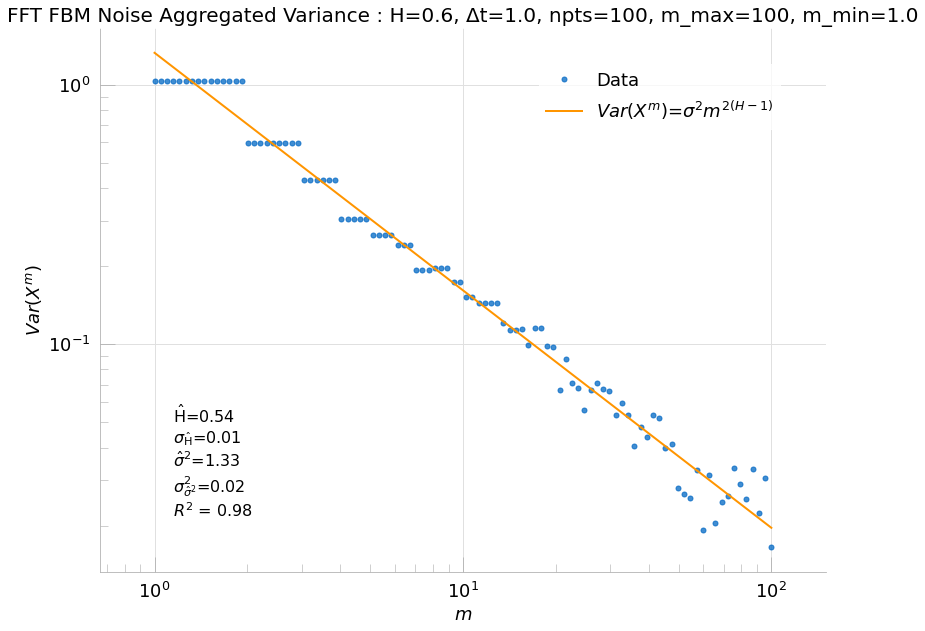

In [14]:
single_var(agg_var, est_type=FBM.Est.AGG_VAR)

## Simulation $H=0.4$

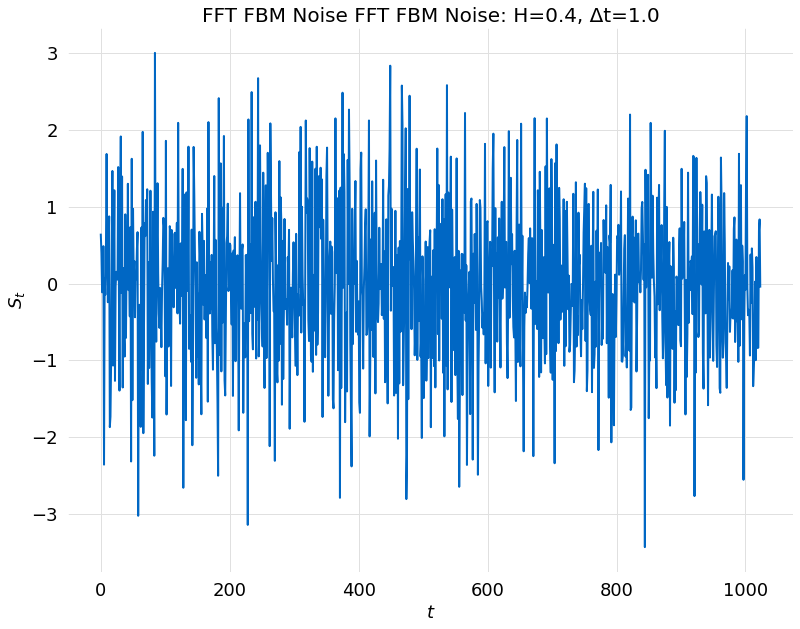

In [15]:
H = 0.4
fbm = FBM.Source.NOISE_FFT.create(H=H, npts=npts)
curve(fbm)

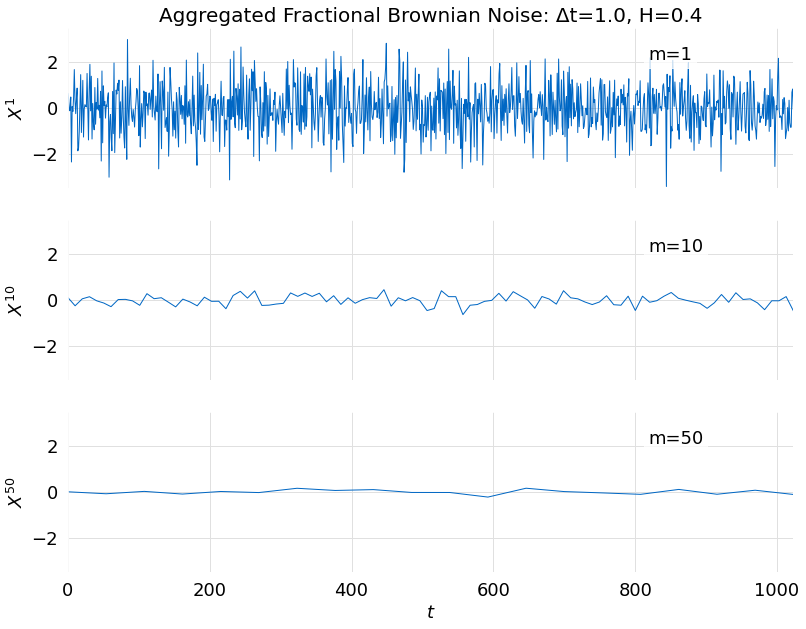

In [16]:
agg_comparison(fbm, H)

In [17]:
agg_var = Stats.Func.AGG_VAR.apply(fbm, m_max=nagg, npts=nagg)
agg_var.attrs

{'SourceType': <Source.NOISE_FFT: 'FBM_NOISE_FFT'>,
 'SourceName': 'FFT-FBM-Noise-Simulation-696ccf50-a1cb-406d-9c61-cd4d0e259ac3',
 'Schema': DataSchema(xcol=(t), ycol=(S(t)), data_type=(DataType.TIME_SERIES)),
 'Date': '20/06/2022 16:18:40',
 'Type': <Func.AGG_VAR: 'AGG_VAR'>,
 'Name': 'AGG_VAR-40f1ec07-77ae-4d3d-939a-2113b19875f5',
 'SchemaIterations': None,
 'FBM_NOISE_FFT': {'npts': 1024,
  'DataType': <DataType.TIME_SERIES: 'TIME_SERIES'>,
  'Parameters': {'H': 0.4, 'Δt': 1.0},
  'Description': 'FFT FBM Noise',
  'ylabel': '$S_t$',
  'xlabel': '$t$',
  'SourceSchema': None,
  'Formula': None,
  'Estimates': {},
  'Tests': {}},
 'AGG_VAR': {'npts': 100,
  'DataType': <DataType.TIME_SERIES: 'TIME_SERIES'>,
  'Parameters': {'npts': 100, 'm_max': 100, 'm_min': 1.0},
  'Description': 'Aggregated Variance',
  'ylabel': '$Var(X^m)$',
  'xlabel': '$m$',
  'SourceSchema': DataSchema(xcol=(t), ycol=(S(t)), data_type=(DataType.TIME_SERIES)),
  'Formula': None,
  'Estimates': {},
  'Tests': 

In [18]:
results = FBM.Est.AGG_VAR.perform(agg_var)
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   S(t)   R-squared:                       0.988
Model:                            OLS   Adj. R-squared:                  0.988
Method:                 Least Squares   F-statistic:                     8110.
Date:                Mon, 20 Jun 2022   Prob (F-statistic):           4.80e-96
Time:                        16:18:40   Log-Likelihood:                 105.85
No. Observations:                 100   AIC:                            -207.7
Df Residuals:                      98   BIC:                            -202.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1472      0.017      8.746      0.000       0.114       0.181
t             -1.3097      0.015    -90.054      0.000      -1.339      -1.281
==============================================================================
Omnibus:                        4.356   Durbin-Watson:                   1.274
Prob(Omnibus):                  0.113   Jarque-Bera (JB):                4.102
Skew:                           0.496   Prob(JB):                        0.129
Kurtosis:                       3.005   Cond. No.                         3.75
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [19]:
agg_var.attrs

{'SourceType': <Source.NOISE_FFT: 'FBM_NOISE_FFT'>,
 'SourceName': 'FFT-FBM-Noise-Simulation-696ccf50-a1cb-406d-9c61-cd4d0e259ac3',
 'Schema': DataSchema(xcol=(t), ycol=(S(t)), data_type=(DataType.TIME_SERIES)),
 'Date': '20/06/2022 16:18:40',
 'Type': <Func.AGG_VAR: 'AGG_VAR'>,
 'Name': 'AGG_VAR-40f1ec07-77ae-4d3d-939a-2113b19875f5',
 'SchemaIterations': None,
 'FBM_NOISE_FFT': {'npts': 1024,
  'DataType': <DataType.TIME_SERIES: 'TIME_SERIES'>,
  'Parameters': {'H': 0.4, 'Δt': 1.0},
  'Description': 'FFT FBM Noise',
  'ylabel': '$S_t$',
  'xlabel': '$t$',
  'SourceSchema': None,
  'Formula': None,
  'Estimates': {},
  'Tests': {}},
 'AGG_VAR': {'npts': 100,
  'DataType': <DataType.TIME_SERIES: 'TIME_SERIES'>,
  'Parameters': {'npts': 100, 'm_max': 100, 'm_min': 1.0},
  'Description': 'Aggregated Variance',
  'ylabel': '$Var(X^m)$',
  'xlabel': '$m$',
  'SourceSchema': DataSchema(xcol=(t), ycol=(S(t)), data_type=(DataType.TIME_SERIES)),
  'Formula': None,
  'Estimates': {'AGG_VAR': {'E

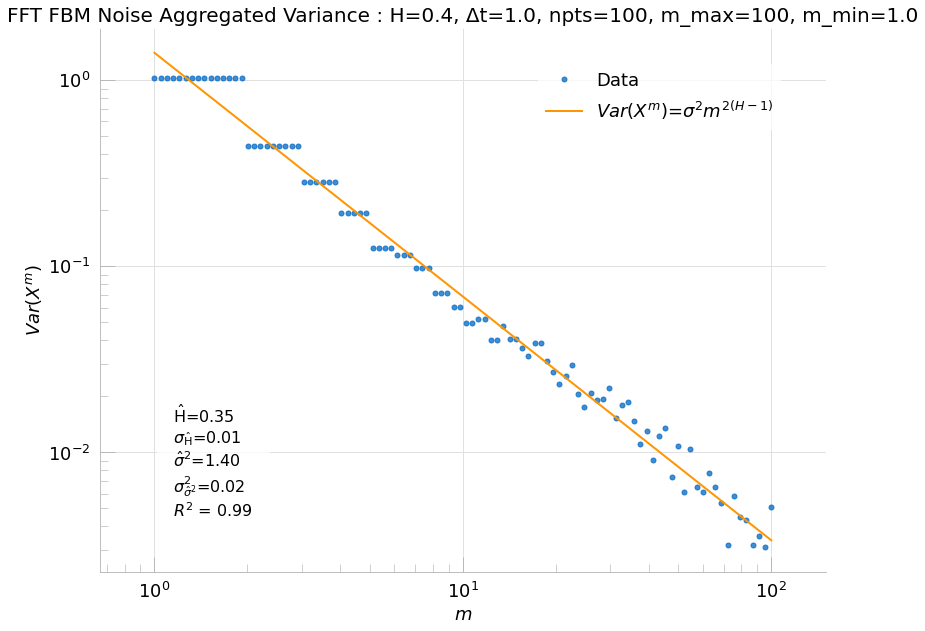

In [20]:
single_var(agg_var, est_type=FBM.Est.AGG_VAR)

## Simulation $H=0.2$

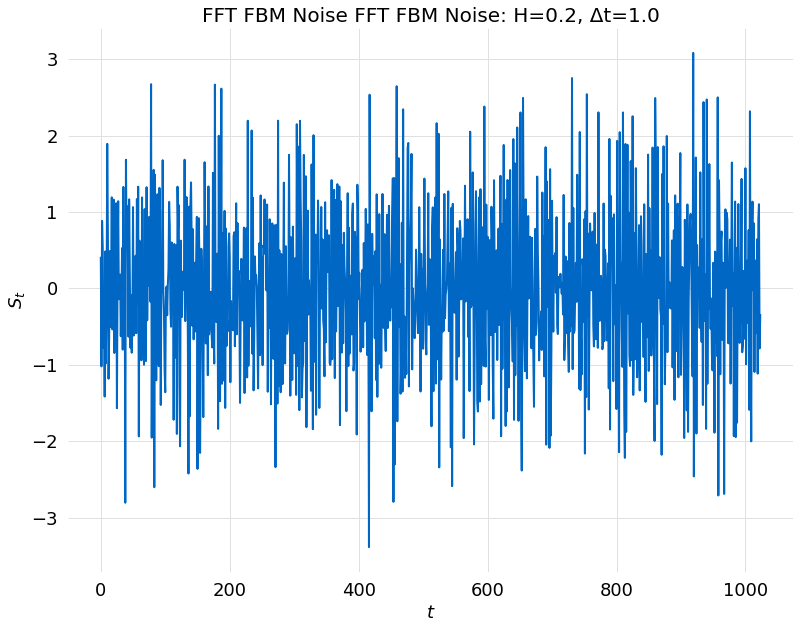

In [21]:
H = 0.2
fbm = FBM.Source.NOISE_FFT.create(H=H, npts=npts)
curve(fbm)

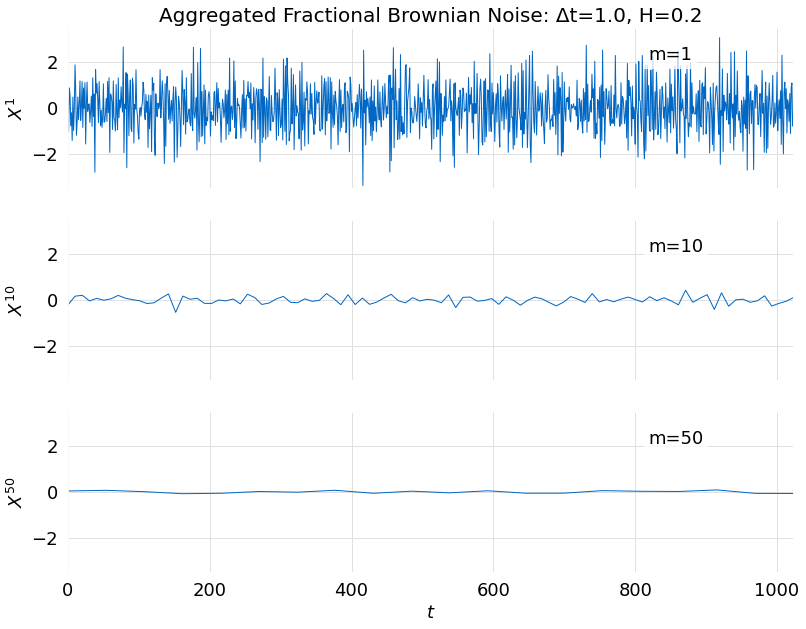

In [22]:
agg_comparison(fbm, H)

In [23]:
agg_var = Stats.Func.AGG_VAR.apply(fbm, m_max=nagg, npts=nagg)
agg_var.attrs

{'SourceType': <Source.NOISE_FFT: 'FBM_NOISE_FFT'>,
 'SourceName': 'FFT-FBM-Noise-Simulation-5ac1bc10-9e60-4724-a9c8-8a0f47064521',
 'Schema': DataSchema(xcol=(t), ycol=(S(t)), data_type=(DataType.TIME_SERIES)),
 'Date': '20/06/2022 16:18:41',
 'Type': <Func.AGG_VAR: 'AGG_VAR'>,
 'Name': 'AGG_VAR-cb007b27-d341-461c-ab48-8fb22e23babd',
 'SchemaIterations': None,
 'FBM_NOISE_FFT': {'npts': 1024,
  'DataType': <DataType.TIME_SERIES: 'TIME_SERIES'>,
  'Parameters': {'H': 0.2, 'Δt': 1.0},
  'Description': 'FFT FBM Noise',
  'ylabel': '$S_t$',
  'xlabel': '$t$',
  'SourceSchema': None,
  'Formula': None,
  'Estimates': {},
  'Tests': {}},
 'AGG_VAR': {'npts': 100,
  'DataType': <DataType.TIME_SERIES: 'TIME_SERIES'>,
  'Parameters': {'npts': 100, 'm_max': 100, 'm_min': 1.0},
  'Description': 'Aggregated Variance',
  'ylabel': '$Var(X^m)$',
  'xlabel': '$m$',
  'SourceSchema': DataSchema(xcol=(t), ycol=(S(t)), data_type=(DataType.TIME_SERIES)),
  'Formula': None,
  'Estimates': {},
  'Tests': 

In [24]:
results = FBM.Est.AGG_VAR.perform(agg_var)
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   S(t)   R-squared:                       0.985
Model:                            OLS   Adj. R-squared:                  0.984
Method:                 Least Squares   F-statistic:                     6226.
Date:                Mon, 20 Jun 2022   Prob (F-statistic):           1.70e-90
Time:                        16:18:41   Log-Likelihood:                 66.418
No. Observations:                 100   AIC:                            -128.8
Df Residuals:                      98   BIC:                            -123.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1889      0.025      7.565      0.000       0.139       0.238
t             -1.7022      0.022    -78.903      0.000      -1.745      -1.659
==============================================================================
Omnibus:                       26.654   Durbin-Watson:                   1.015
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               44.831
Skew:                           1.133   Prob(JB):                     1.84e-10
Kurtosis:                       5.372   Cond. No.                         3.75
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [25]:
agg_var.attrs

{'SourceType': <Source.NOISE_FFT: 'FBM_NOISE_FFT'>,
 'SourceName': 'FFT-FBM-Noise-Simulation-5ac1bc10-9e60-4724-a9c8-8a0f47064521',
 'Schema': DataSchema(xcol=(t), ycol=(S(t)), data_type=(DataType.TIME_SERIES)),
 'Date': '20/06/2022 16:18:41',
 'Type': <Func.AGG_VAR: 'AGG_VAR'>,
 'Name': 'AGG_VAR-cb007b27-d341-461c-ab48-8fb22e23babd',
 'SchemaIterations': None,
 'FBM_NOISE_FFT': {'npts': 1024,
  'DataType': <DataType.TIME_SERIES: 'TIME_SERIES'>,
  'Parameters': {'H': 0.2, 'Δt': 1.0},
  'Description': 'FFT FBM Noise',
  'ylabel': '$S_t$',
  'xlabel': '$t$',
  'SourceSchema': None,
  'Formula': None,
  'Estimates': {},
  'Tests': {}},
 'AGG_VAR': {'npts': 100,
  'DataType': <DataType.TIME_SERIES: 'TIME_SERIES'>,
  'Parameters': {'npts': 100, 'm_max': 100, 'm_min': 1.0},
  'Description': 'Aggregated Variance',
  'ylabel': '$Var(X^m)$',
  'xlabel': '$m$',
  'SourceSchema': DataSchema(xcol=(t), ycol=(S(t)), data_type=(DataType.TIME_SERIES)),
  'Formula': None,
  'Estimates': {'AGG_VAR': {'E

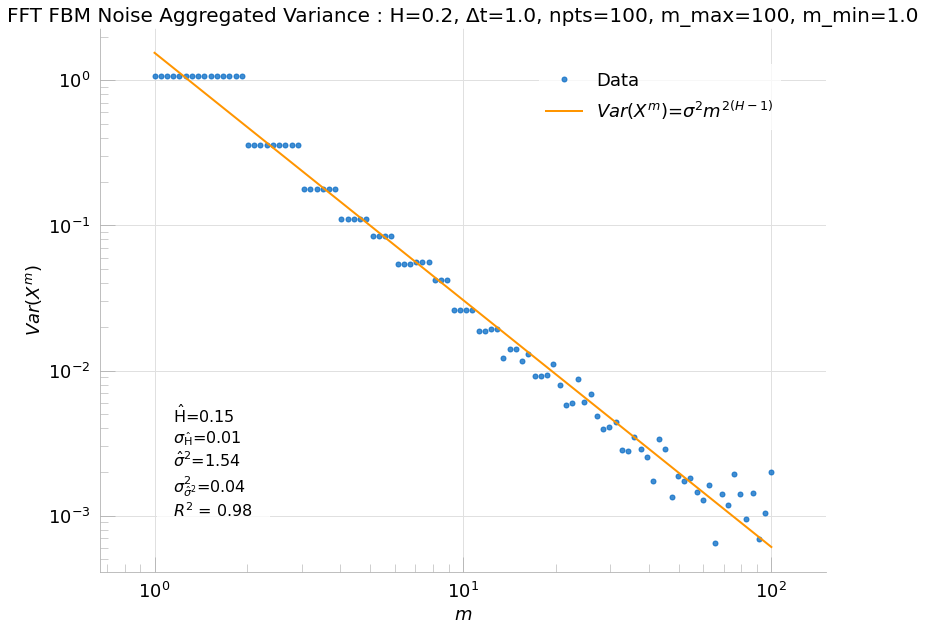

In [26]:
single_var(agg_var, est_type=FBM.Est.AGG_VAR)